In [17]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegressionCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, f1_score

# Import data

In [3]:
train = pd.read_csv('train.csv')

# Model building and evaluation

In [4]:
X = train.drop(['date','IS_CRIME'], axis=1)
y = train['IS_CRIME']
X.columns

Index(['DISTRICT_ID', 'dayOfWeek', 'timeOfDay_afternoon', 'timeOfDay_morning',
       'timeOfDay_night', 'PARTY_D', 'PARTY_R', 'CCN_BID', 'CCS_BID', 'C_BID',
       'DD_BID', 'OSG_BID', 'WC_BID'],
      dtype='object')

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

## LogisticRegression

In [7]:
logit = LogisticRegressionCV()
logit.fit(X_train, y_train)

0.7388718273290228

In [8]:
print(classification_report(logit.predict(X_test), y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       1.00      0.74      0.85    139039

    accuracy                           0.74    139039
   macro avg       0.50      0.37      0.42    139039
weighted avg       1.00      0.74      0.85    139039



D:\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1272: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## DecisionTreeClassifier

In [19]:
parameters = {
              'max_depth': [3, 5, 7, 10]
}

dt = DecisionTreeClassifier()

gsearch = GridSearchCV(dt, param_grid=parameters, scoring='accuracy', cv=3)
gsearch.fit(X_train, y_train)

print("Best score: %0.3f" % gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.740
Best parameters set:
	max_depth: 7


## GradientBoostingClassifier

In [15]:
parameters = {
              'max_depth': [3, 5, 7],
              'learning_rate': [0.01, 0.05, 0.1],
              'n_estimators': [50, 100, 150]
}

gbdt = GradientBoostingClassifier()

gsearch = GridSearchCV(gbdt, param_grid=parameters, scoring='accuracy', cv=3)
gsearch.fit(X_train, y_train)

print("Best score: %0.3f" % gsearch.best_score_)
print("Best parameters set:")
best_parameters = gsearch.best_estimator_.get_params()
for param_name in sorted(parameters.keys()):
    print("\t%s: %r" % (param_name, best_parameters[param_name]))

Best score: 0.740
Best parameters set:
	learning_rate: 0.05
	max_depth: 5
	n_estimators: 100


In [21]:
gbdt = GradientBoostingClassifier(learning_rate=0.05, max_depth=5, n_estimators=100)
gbdt.fit(X_train, y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.05, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

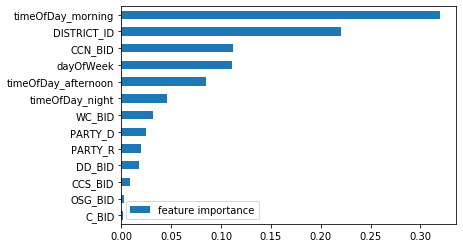

In [29]:
feature_importance = pd.DataFrame(index=X.columns, columns=['feature importance'])
feature_importance['feature importance'] = gbdt.feature_importances_
feature_importance.sort_values(by='feature importance').plot.barh()